### Exploratory model using various Python libraries.

By: Ernest Mack emackiii@gmail.com

Date started: 10/15/2019

Goal: To develop a reproducible workflow for use with any data.

In [1]:
# first we import the neccessary libraries to help with our work
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, box
import fiona
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask
# A package created for this class that will be discussed later in this lesson
import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
import seaborn as sns
sns.set(font_scale=1.5, style="white")

# Get data and set wd
# et.data.get_data("colorado-flood")
# os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))


# Open the Raster data file 

In [2]:
# Open raster data
amphibs = rio.open(r'C:\Users\emack\Documents\UAF-Temperature\data\amphibians.tif')


### Check the data, query the spatial extent of the data using the attribute 'bounds'.

In [3]:
# Query the spatial extent of the data
amphibs.bounds


BoundingBox(left=-180.0, bottom=-54.76666639372698, right=180.00835210923083, top=71.53334019333124)

# Plot the DEM using matplotlib

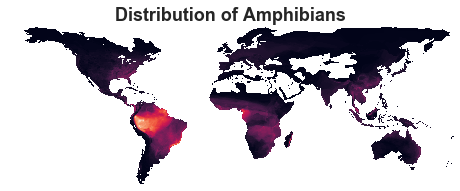

In [10]:
# Plot the dem using raster.io
fig, ax = plt.subplots(figsize = (8,3))
show(amphibs, 
     title="Distribution of Amphibians", 
     ax=ax)
ax.set_axis_off()


In [6]:
with rio.open(r'C:\Users\emack\Documents\UAF-Temperature\data\amphibians.tif') as src:
    # Convert / read the data into a numpy array:
    amphib_im = src.read()
    # Create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)
    # Get bounds of object
    bounds = src.bounds


In [7]:
with rio.open(r'C:\Users\emack\Documents\UAF-Temperature\data\amphibians.tif') as src:
    # convert / read the data into a numpy array: masked= True turns `nodata` values to nan
    amphib_im = src.read(1, masked=True)
    # create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)

print("object shape:", amphib_im.shape)
print("object type:", type(amphib_im))


object shape: (15156, 43201)
object type: <class 'numpy.ma.core.MaskedArray'>


## Plot Numpy Array

Plot the data using ep.plot_bands(). Notice the ep.plot_bands() with the spatial_extent object created above to ensure that the x and y axis represent the pixel locations of the raster data.

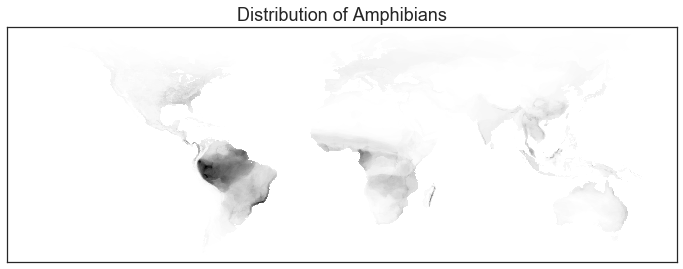

In [9]:
ep.plot_bands(amphib_im,
              cmap='Greys',
              extent=spatial_extent,
              title="Distribution of Amphibians",
              cbar=False)
plt.show()


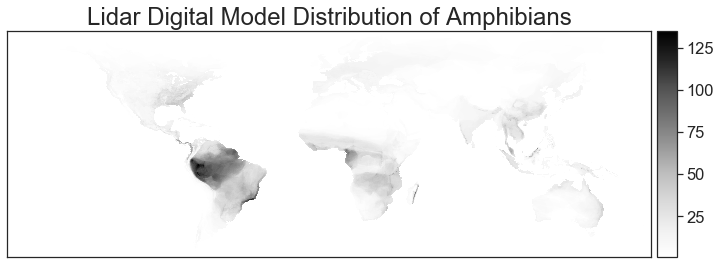

In [11]:
fig, ax = plt.subplots(figsize=(12, 10))
ep.plot_bands(amphib_im,
              cmap='Greys',
              extent=spatial_extent,
              scale=False,
              ax=ax)
ax.set_title("Lidar Digital Model Distribution of Amphibians", fontsize=24)
plt.show()


# Explore Raster Data Values with Histograms

In [12]:
amphib_im

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=255,
  dtype=uint8)

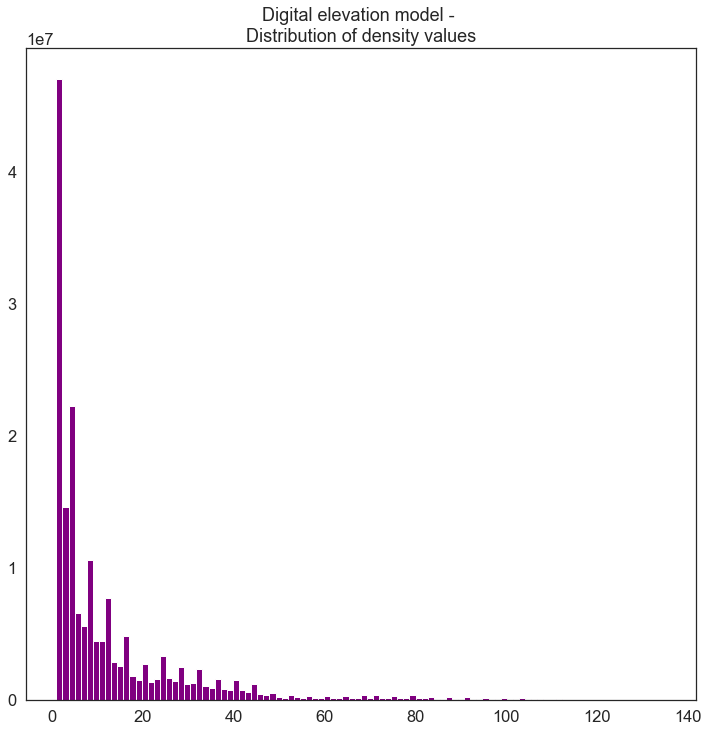

In [13]:
# Plot histogram
ep.hist(amphib_im[~amphib_im.mask].ravel(),
        bins=100,
        title="Digital elevation model - \nDistribution of density values")
plt.show()


In [1]:
import requests as rq

In [4]:
response = rq.get("http://api.open-notify.org/this-api-doesnt-exist")

In [5]:
print(response.status_code)

404
